In [119]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 

import os

In [120]:
root_dataset = "datasets/titanic/"
df_train = pd.read_csv(root_dataset+"train.csv", index_col= "PassengerId")
df_test = pd.read_csv(root_dataset+"test.csv", index_col= "PassengerId")



In [121]:
def draw_line():
    print("-"*60)


df_train.info()
print("훈련 데이터셋의 shape는 -> ", df_train.shape)
print("테스트 데이터셋의 shape는 -> ", df_test.shape)
draw_line()
display(df_train.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
훈련 데이터셋의 shape는 ->  (891, 11)
테스트 데이터셋의 shape는 ->  (418, 10)
------------------------------------------------------------


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 데이터셋의 특성 정리

Survival: 생존 여부. 0 = 사망, 1 = 생존, 해당 프로젝트의 target<br>
Pclass: 좌석 등급. 1 = 1등석, 2 = 2등석, 3 = 3등석<br>
Sex: 성별. male = 남성, female = 여성<br>
Age: 나이<br>
SibSp: 동승한 Sibling = 형제자매 + Spouse = 배우자 의 수<br>
Parch: 동승한 Parent = 부모 + Child = 자식 의 수<br>
Ticket: 티켓 번호<br>
Fare: 요금<br>
Cabin: 방 호수<br>
Embarked: 타이타닉 호에 승객이 승선한 곳<br>

### 결측치 처리


In [122]:
print("Null 값 탐색")
display("train : ", df_train.isnull().sum())
draw_line()
display("test : ",df_test.isnull().sum())

Null 값 탐색


'train : '

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

------------------------------------------------------------


'test : '

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

Cabin에 Null 값이 너무 많아서 데이터셋에서 Cabin을 제외하기로 결정함.<br>
Age와 Embarked의 결측치는 각각 중앙값과 가장 많은 값으로 채우기로 결정함.<br>


In [123]:
#Cabin 열을 데이터셋에서 제거
df_train.drop("Cabin", axis=1, inplace=True)
df_test.drop("Cabin", axis=1, inplace=True)


In [124]:

df_train["Age"].isna().sum()
corr_matrix = df_train.corr(numeric_only=True)
import sklearn.impute
from sklearn.impute import SimpleImputer
from sklearn.impute import IterativeImputer
from sklearn.experimental import enable_iterative_imputer

print(corr_matrix["Age"])
df_to_iterAge = df_train.loc[:, ["Age", "SibSp", "Parch", "Pclass"]]
index_nan = df_to_iterAge.loc[df_to_iterAge["Age"].isna()].index



Survived   -0.077221
Pclass     -0.369226
Age         1.000000
SibSp      -0.308247
Parch      -0.189119
Fare        0.096067
Name: Age, dtype: float64


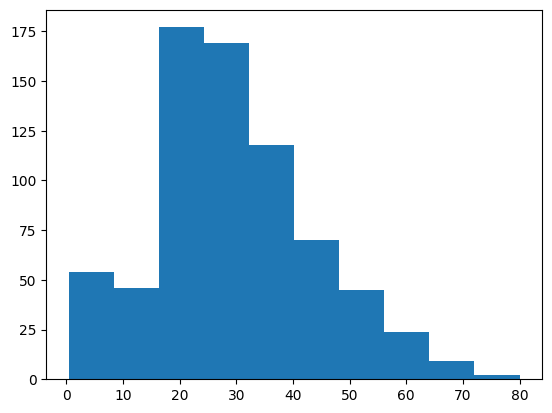

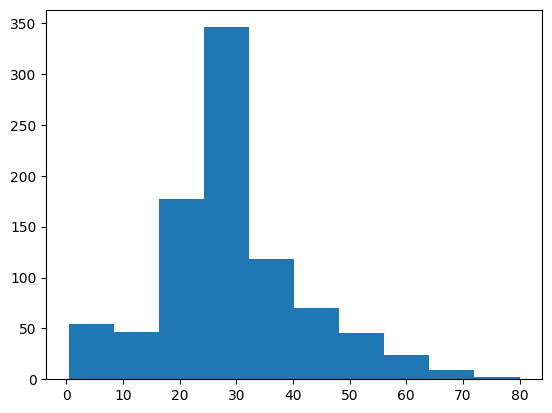

count    891.000000
mean      29.349187
std       13.480669
min        0.000000
25%       22.000000
50%       27.756856
75%       36.000000
max       80.000000
Name: Age, dtype: float64

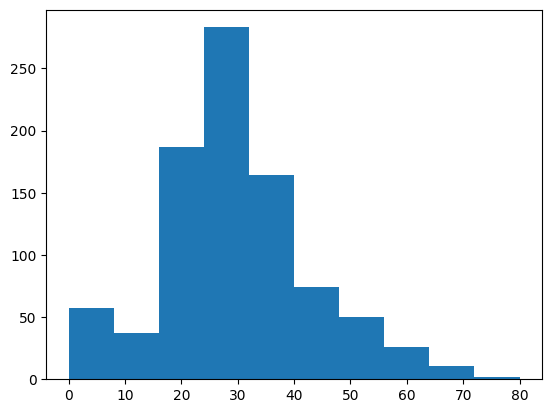

In [125]:
plt.hist(df_to_iterAge["Age"])
plt.show()
Imputer = SimpleImputer(strategy="median")


df_simple = pd.DataFrame(Imputer.fit_transform(df_to_iterAge), columns=df_to_iterAge.columns)
df_simple
plt.hist(df_simple["Age"])
plt.show()
Imputer_iter = IterativeImputer(max_iter=10, random_state=42, skip_complete=True, min_value=0)
df_iterage = pd.DataFrame(Imputer_iter.fit_transform(df_to_iterAge), columns= df_to_iterAge.columns)

plt.hist(df_iterage["Age"])
df_iterage["Age"].describe()

In [126]:

print(df_to_iterAge.describe())
print(df_iterage.describe())

              Age       SibSp       Parch      Pclass
count  714.000000  891.000000  891.000000  891.000000
mean    29.699118    0.523008    0.381594    2.308642
std     14.526497    1.102743    0.806057    0.836071
min      0.420000    0.000000    0.000000    1.000000
25%     20.125000    0.000000    0.000000    2.000000
50%     28.000000    0.000000    0.000000    3.000000
75%     38.000000    1.000000    0.000000    3.000000
max     80.000000    8.000000    6.000000    3.000000
              Age       SibSp       Parch      Pclass
count  891.000000  891.000000  891.000000  891.000000
mean    29.349187    0.523008    0.381594    2.308642
std     13.480669    1.102743    0.806057    0.836071
min      0.000000    0.000000    0.000000    1.000000
25%     22.000000    0.000000    0.000000    2.000000
50%     27.756856    0.000000    0.000000    3.000000
75%     36.000000    1.000000    0.000000    3.000000
max     80.000000    8.000000    6.000000    3.000000


In [127]:
df_train.groupby(["Pclass"])["Fare"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

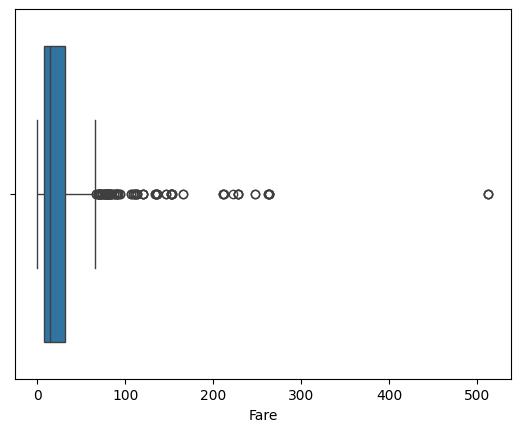

In [128]:

display(df_train["Fare"].describe())
sns.boxplot(x = "Fare", data= df_train)

<Axes: xlabel='Survived', ylabel='count'>

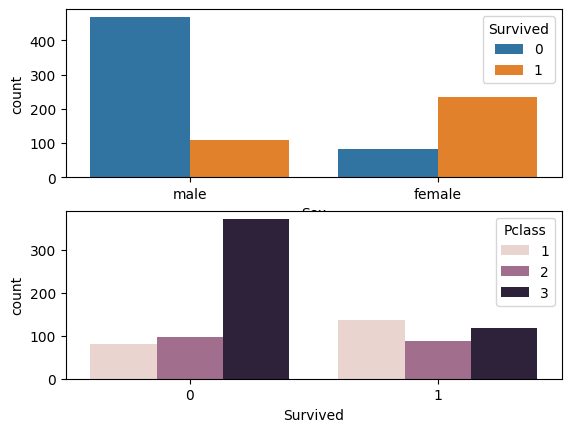

In [129]:
plt.subplot(2, 1, 1)

sns.countplot(x = "Sex", data = df_train, hue="Survived")
plt.subplot(2, 1, 2)
sns.countplot(x = "Survived", data = df_train, hue="Pclass")


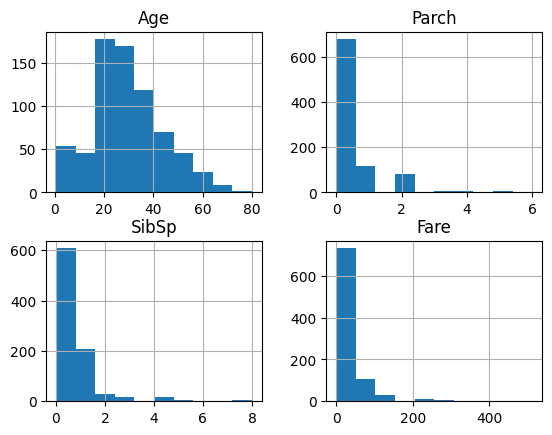

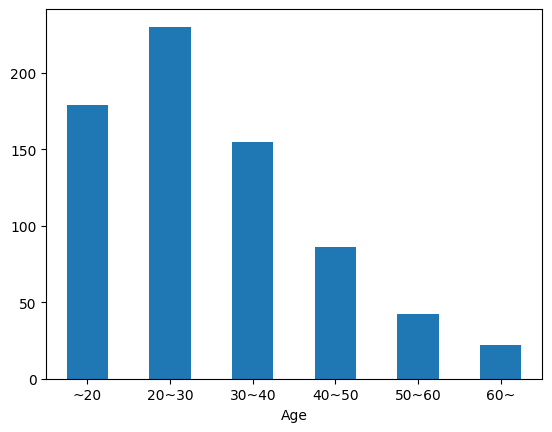

In [130]:
df_train[["Age", "Parch", "SibSp", "Fare"]].hist()
plt.show()
ages = pd.cut(df_train["Age"],
              bins=[0, 20, 30, 40, 50, 60, np.inf],
              labels=["~20", "20~30", "30~40", "40~50", "50~60", "60~"])

ages.value_counts().sort_index().plot.bar(rot=0)
plt.show()


In [131]:

corr_matrix = df_train.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

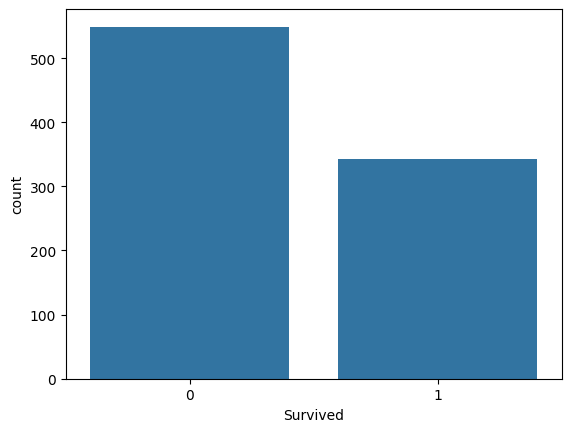

In [132]:
sns.countplot(x = "Survived", data = df_train)
df_train["Survived"].value_counts(normalize=True)

In [133]:
display(df_train["Age"].describe())
display(df_train.groupby("Survived")["Age"].describe())
display(df_train.loc[df_train["Age"] == max(df_train["Age"])])
display(df_train.loc[df_train["Age"] == min(df_train["Age"])])

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,S


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,C


<Axes: xlabel='Survived', ylabel='Age'>

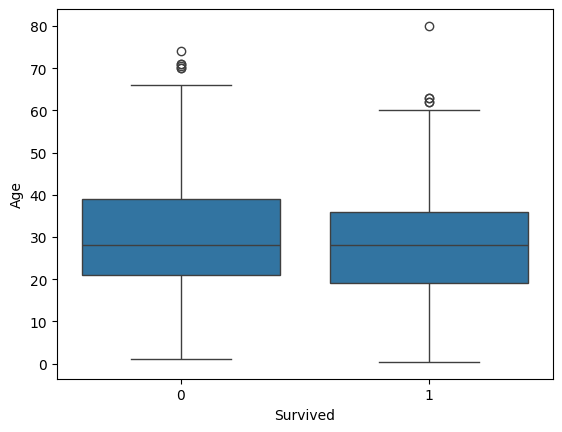

In [134]:
sns.boxplot(x = "Survived", y = "Age", data= df_train)

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.1125      1
8.1375      1
17.4000     1
8.1583      1
7.7292      1
Name: count, Length: 248, dtype: int64

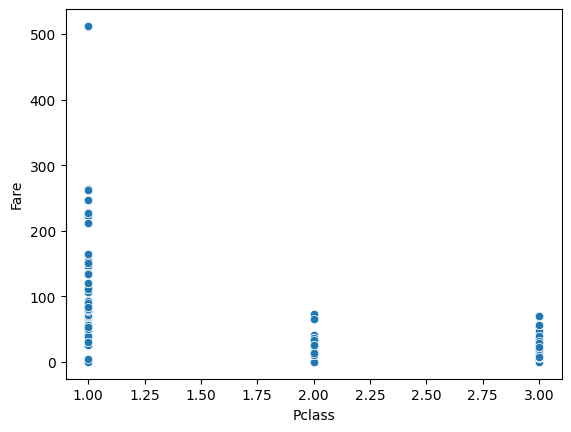

In [135]:
sns.scatterplot(x = "Pclass", y = "Fare", data = df_train)
df_train.groupby("Pclass")["Fare"].describe()

df_train.loc[df_train["Fare"] == 0]

df_train.value_counts("Fare")



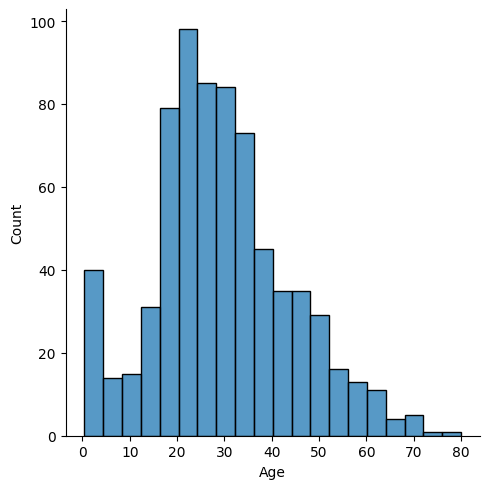

In [136]:
sns.displot(df_train["Age"])